# Name: DANIEL AKINWANDE GEORGE
# Matric No: EES/20/21/0110
# Coursecode: FEG390 (SWEP)
# Level: 300L

## Project: Making Prediction of house price using the following maching learning models based on the data available in the Aemf1.csv dataset:
#### 1. LinearRegression
#### 2. RandomForestRegressor
#### 3. DecisionTreeRegressor

## Also, check for the following evaluation metrics
#### - RMSE
#### - MAE
#### - MSE
#### - Accuracy (R2)



### Library used in this Project
###### Imported library is pandas under the alias pd.


In [1]:
import pandas as pd


###### Imported Library for LinearRegression Model

In [2]:
from sklearn.linear_model import LinearRegression

###### Imported Library for RandomForestRegression Model

In [3]:
from sklearn.ensemble import RandomForestRegressor

###### Imported Library for DecisionTreeRegression Model

In [4]:
from sklearn.tree import DecisionTreeRegressor

###### Imported Library for Metrics

In [5]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
import sklearn.metrics as sm

###### Imported Library for Data Visualization

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

###### Importing the Dataset and assigning it to variable 'df'

In [7]:
df = pd.read_csv('Aemf1.csv')

#### Understanding the Dataset
###### This displays the first 5 rows of data

In [8]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


###### This displays the total number of rows and columns

In [9]:
df.shape

(41714, 19)

###### This shows the total sum of empty cells in every column in the data set.

In [10]:
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

### Converting letters(strings) to numbers(0,1) that the computer understands

In [11]:
df = pd.get_dummies(data=df, columns=['City', 'Day', 'Room Type', 'Shared Room', 'Private Room', 'Superhost'], drop_first=True)

In [12]:
df.head()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,...,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend,Room Type_Private room,Room Type_Shared room,Shared Room_True,Private Room_True,Superhost_True
0,194.033698,2.0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,...,0,0,0,0,0,1,0,0,1,0
1,344.245776,4.0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,...,0,0,0,0,0,1,0,0,1,0
2,264.101422,2.0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,...,0,0,0,0,0,1,0,0,1,0
3,433.529398,4.0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,...,0,0,0,0,0,1,0,0,1,0
4,485.552926,2.0,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,...,0,0,0,0,0,1,0,0,1,1


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
df.columns

Index(['Price', 'Person Capacity', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index', 'City_Athens', 'City_Barcelona',
       'City_Berlin', 'City_Budapest', 'City_Lisbon', 'City_Paris',
       'City_Rome', 'City_Vienna', 'Day_Weekend', 'Room Type_Private room',
       'Room Type_Shared room', 'Shared Room_True', 'Private Room_True',
       'Superhost_True'],
      dtype='object')

In [15]:
col = df.columns

In [16]:
Scaler = MinMaxScaler()

In [17]:
Scaler = Scaler.fit_transform(df)
Scaler

array([[0.00860338, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01671827, 0.5       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01238864, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.03254283, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01438494, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00531862, 0.5       , 1.        , ..., 0.        , 1.        ,
        1.        ]])

In [18]:
df = Scaler
df=pd.DataFrame(df, columns=col)

### Creating the x-array and assigning it to variable x.
###### (x contains the data that will be used to make predictions)

In [19]:
X = df.drop(['Price'],axis=1)

#### Creating the y-array and assigning it to variable y.
###### (y contains the data that we are trying to predict)

In [20]:
y = df['Price']

### Splitting the Data Set into Training Data and Test Data.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X.head()

,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,...,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekend,Room Type_Private room,Room Type_Shared room,Shared Room_True,Private Room_True,Superhost_True
0,0.0,1.0,0.0,1.000,0.9125,0.1,0.198180,0.177775,0.014125,0.032707,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.5,0.0,0.0,0.750,0.8125,0.1,0.018732,0.016614,0.136943,0.327987,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.875,0.8375,0.1,0.226885,0.255711,0.013366,0.030882,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.5,0.0,1.0,0.875,0.8750,0.2,0.014635,0.030661,0.106286,0.254284,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.000,0.9750,0.1,0.020962,0.022170,0.119526,0.286115,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


#### The test data is 20% of the entire data set:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)

## Building and Training the Model

#### Creating an instance of LinearRegression and assigning it to a variable called 'linear_model'

In [24]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

#### Creating an instance of RandomForestRegression and assigning it to a variable called 'rf_model'

In [25]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

#### Creating an instance of DecisionTreeRegression and assigning it to a variable called 'dt_model'

In [26]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

#### Making predictions on the test set using all three models.

In [27]:
linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

### Calculating evaluation metrics for each model
###### 1. LinearRegression metrics

In [28]:
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

###### 2. RandomForestRegression metrics

In [29]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

###### 3. DecisionTreeRegression metrics

In [30]:
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [31]:
print("Linear Regression:")
print(f"MSE: {linear_mse}")
print(f"MAE: {linear_mae}")
print(f"R2: {linear_r2}")
print("\nRandom Forest:")
print(f"MSE: {rf_mse}")
print(f"MAE: {rf_mae}")
print(f"R2: {rf_r2}")
print("\nDecision Tree:")
print(f"MSE: {dt_mse}")
print(f"MAE: {dt_mae}")
print(f"R2: {dt_r2}")

Linear Regression:
MSE: 0.0001400143482025719
MAE: 0.004512482845893315
R2: 0.27609100284525667

Random Forest:
MSE: 5.2836070599444714e-05
MAE: 0.0027585125068174004
R2: 0.7268243764138834

Decision Tree:
MSE: 5.5464392451557034e-05
MAE: 0.0028222229908285703
R2: 0.7132352988615617


### Comparing Actual Values and Predicted Values

In [32]:
df_1 = pd.DataFrame(data={"Actual Values": y_test, "Predicted Values": linear_predictions})

In [33]:
df_1.head()

,Actual Values,Predicted Values
37884,0.006545,0.013364
36633,0.003615,0.002490
30431,0.006230,0.014098
1550,0.008211,0.021862
18733,0.009220,0.007365


In [34]:
df_2 = pd.DataFrame(data={"Actual Values": y_test, "Predicted Values": rf_predictions})

In [35]:
df_2.head()

,Actual Values,Predicted Values
37884,0.006545,0.007354
36633,0.003615,0.003678
30431,0.006230,0.006759
1550,0.008211,0.013523
18733,0.009220,0.010885


In [36]:
df_3 = pd.DataFrame(data={"Actual Values": y_test, "Predicted Values": dt_predictions})

In [37]:
df_3.head()

,Actual Values,Predicted Values
37884,0.006545,0.006520
36633,0.003615,0.003590
30431,0.006230,0.005586
1550,0.008211,0.013262
18733,0.009220,0.006711


## Data Visualization
###### 1. Linear Regression Graph

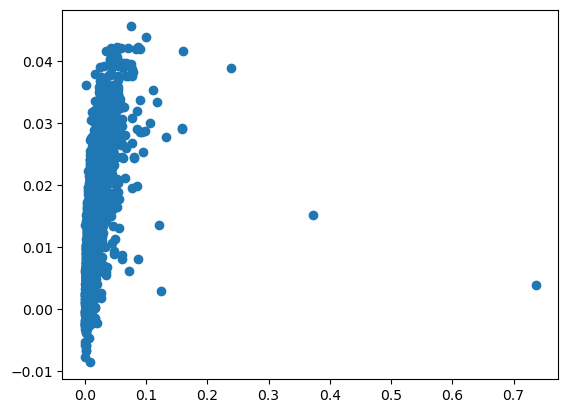

In [38]:
plt.scatter(y_test, linear_predictions)

###### 2. Random Forest Regression Graph

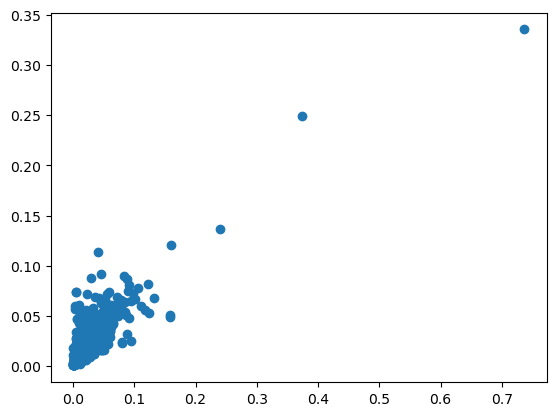

In [39]:
plt.scatter(y_test, rf_predictions)

###### 3. Decision Tree Regression

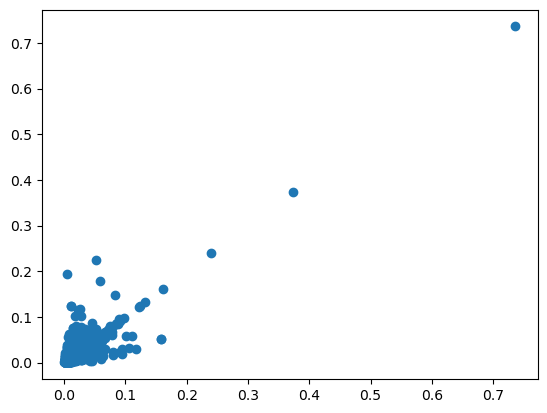

In [40]:
plt.scatter(y_test, dt_predictions)

### Conclusion:
##### The near to accurate model is the RandomForest Regression Model